In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = 'reserv_no')
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = 'item_id')
df_branch_items <- df_f_join_2 %>% filter(branch == '강남'|branch == '마포'|branch == '서초')
table(df_branch_items$branch, df_branch_items$product_name)

      
       JUICE PASTA PIZZA SALAD SALAD_BAR SANDWICH SEA_FOOD SPECIAL_SET STEAK
  강남     2     4     5     2         3        2        4          13    12
  마포     1     2     4     0         3        3        1           4     3
  서초     1     5     2     1         2        1        0           2     5
      
       WINE
  강남    5
  마포    0
  서초    0

In [3]:
df_branch_items

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019081703,20190817,1800,W1341787,강남,3,N,190817678402100100,M0003,2,34000,PIZZA,피자,FOOD,17000
2019081701,20190817,1800,W1334366,강남,2,N,190817578349100100,M0002,2,24000,PASTA,파스타,FOOD,12000
2019081602,20190816,1800,W1338910,강남,7,N,190816578383100100,M0001,3,72000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019081602,20190816,1800,W1338910,강남,7,N,190816578383100100,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019080801,20190808,1200,W1338910,강남,2,N,190808578383100100,M0001,1,24000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019080801,20190808,1200,W1338910,강남,2,N,190808578383100100,M0009,1,8000,WINE,와인,BEVERAGE,8000
2019080602,20190806,1800,W1340914,마포,2,N,190806547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019072002,20190720,1200,W1337382,강남,1,N,190720137246110010,M0008,1,10000,SANDWICH,샌드위치,FOOD,10000
2019071001,20190710,1200,W1335587,서초,4,N,190710107234110010,M0002,4,48000,PASTA,파스타,FOOD,12000


In [4]:
df_branch_items_table <- as.data.frame(table(df_branch_items$branch, df_branch_items$product_name))

In [7]:
df_branch_items_percent <- df_branch_items_table %>% 
group_by(df_branch_items_table$Var1) %>% 
mutate(percent_items = Freq/sum(Freq) * 100)

head(df_branch_items_percent)

Var1,Var2,Freq,df_branch_items_table$Var1,percent_items
강남,JUICE,2,강남,3.846154
마포,JUICE,1,마포,4.761905
서초,JUICE,1,서초,5.263158
강남,PASTA,4,강남,7.692308
마포,PASTA,2,마포,9.523810
서초,PASTA,5,서초,26.315789


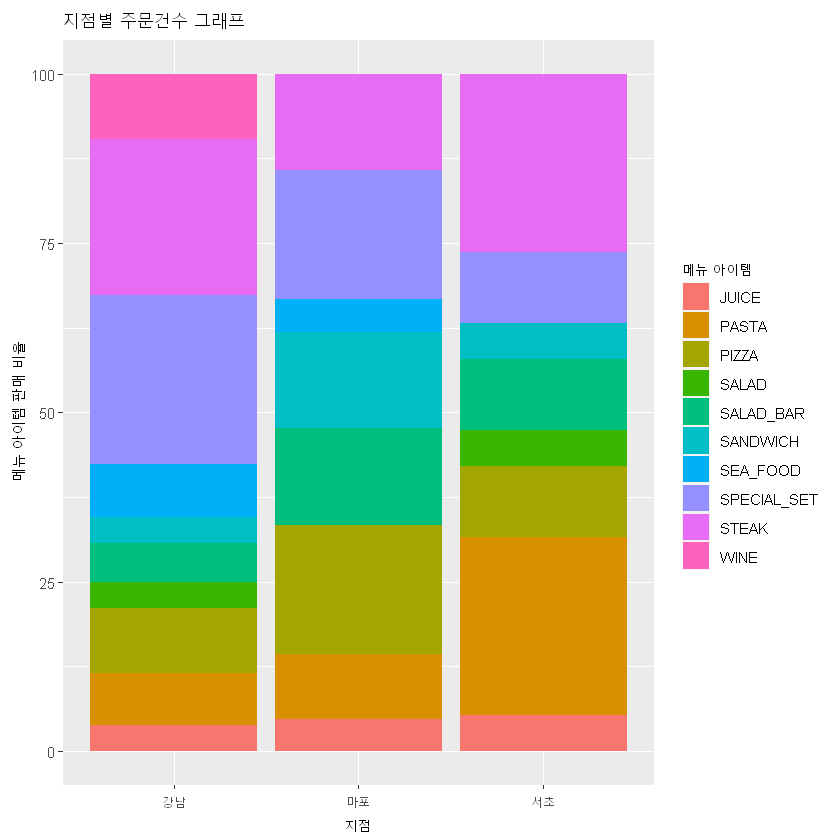

In [12]:
gg <- ggplot(df_branch_items_percent, aes(x = Var1, y = percent_items, group = Var1, fill = Var2))+
geom_bar(stat = 'identity')
gg <- gg + labs(title = '지점별 주문건수 그래프', x = '지점', y = '메뉴 아이템 판매 비율', fill = '메뉴 아이템')
gg

In [13]:
df_rfm_join_1 <- inner_join(reservation_r, order_info_r, by = 'reserv_no')
head(df_rfm_join_1)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000


In [15]:
df_rfm_data <- df_rfm_join_1 %>% 
    group_by(customer_id) %>% 
    summarise(visit_sum = n_distinct(reserv_no), sales_sum = sum(sales)/1000) %>% 
    arrange(customer_id)
df_rfm_data

customer_id,visit_sum,sales_sum
W1327595,2,188
W1327803,2,210
W1328432,3,246
W1328505,5,287
W1328786,1,10
W1328985,2,178
W1328993,1,140
W1329560,1,24
W1329954,1,48
W1329962,2,48


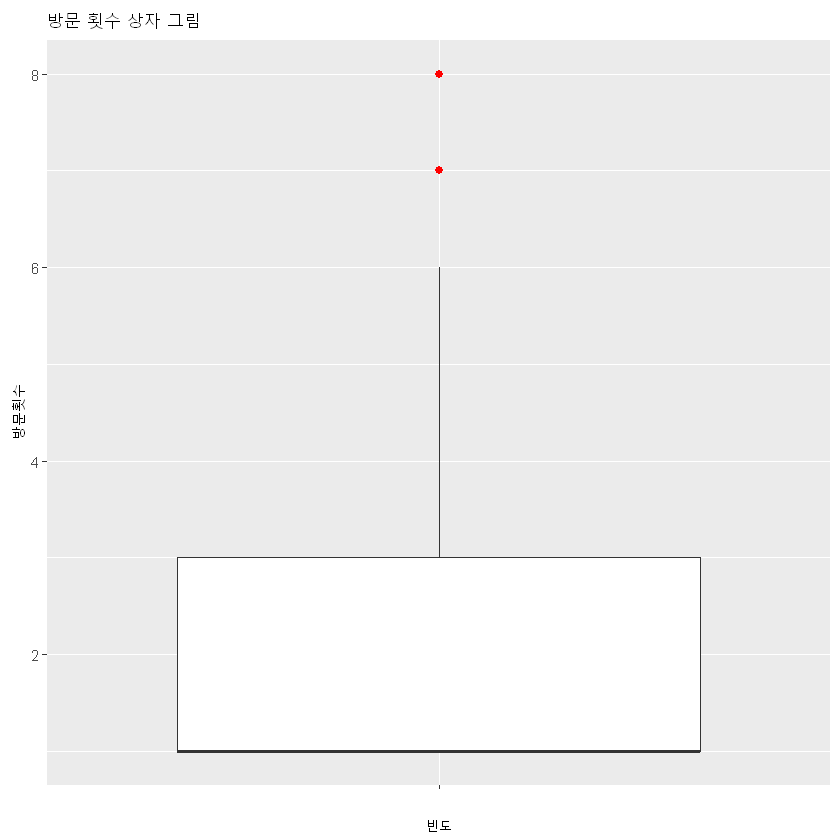

In [16]:
ggplot(df_rfm_data, aes(x = '', y = visit_sum))+
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = 'red')+
    labs(title = '방문 횟수 상자 그림', x = '빈도', y = '방문횟수')

In [17]:
quantile(df_rfm_data$visit_sum, probs= c(0.6, 0.9))
quantile(df_rfm_data$sales_sum, probs= c(0.6, 0.9))

60% 90% 
  2   4

In [20]:
total_sum_data <- df_rfm_data %>% 
    summarise(t_visit_sum = sum(visit_sum), t_sales_sum = sum(sales_sum))

In [21]:
loyalty_sum_data <- df_rfm_data %>% 
    summarise(l_visit_sum = sum(ifelse(visit_sum>2, visit_sum, 0)), l_sales_sum = sum(ifelse(sales_sum > 135, sales_sum, 0)))
loyalty_sum_data / total_sum_data

l_visit_sum,l_sales_sum
0.5163205,0.7496093


In [24]:
df_f_foin_1 <- inner_join(reservation_r, order_info_r, by = 'reserv_no')
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = 'item_id')
target_item <- c('M0005', 'M0009')

In [25]:
df_stime_order <- df_f_join_2 %>% 
    filter((item_id %in% target_item))  %>% 
    group_by(reserv_no) %>% 
    mutate(order_cnt = n()) %>% 
    distinct(branch, reserv_no, order_cnt) %>% 
    filter(order_cnt == 2) %>% 
    arrange(branch)
df_stime_order

branch,reserv_no,order_cnt
강남,2019123107,2
강남,2019122901,2
강남,2019122801,2
강동,2019122810,2
광진,2019122804,2
노원,2019112101,2
동대문,2019091201,2
동대문,2019122703,2
동작,2019112102,2
양천,2019123006,2


In [28]:
stime_order_rsv_no <- df_stime_order$reserv_no

df_stime_sales <- df_f_join_2 %>% 
    filter((reserv_no %in% stime_order_rsv_no) & (item_id %in% target_item)) %>% 
    group_by(reserv_no, product_name) %>% 
    summarise(sales_amt = sum(sales) / 1000) %>% 
    arrange(product_name, reserv_no)

df_stime_sales

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [34]:
steak <- df_stime_sales %>% filter(product_name == "STEAK")
wine <- df_stime_sales %>% filter(product_name == "WINE")

In [35]:
cor.test(steak$sales_amt, wine$sales_amt)


	Pearson's product-moment correlation

data:  steak$sales_amt and wine$sales_amt
t = 9.5423, df = 10, p-value = 2.438e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8244838 0.9859970
sample estimates:
      cor 
0.9492339 


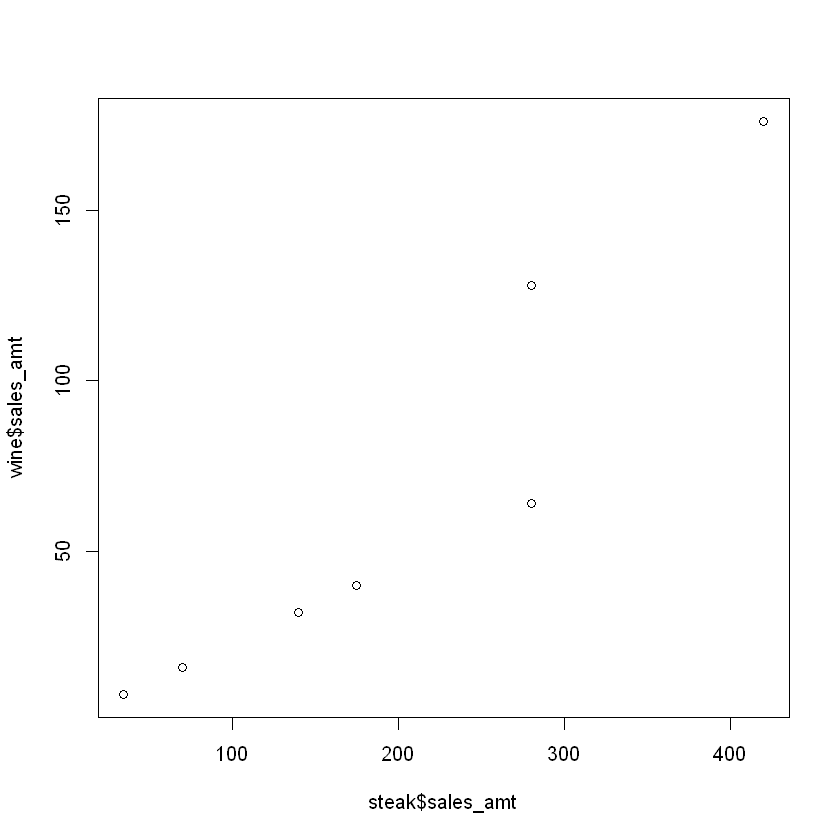

In [36]:
plot(steak$sales_amt, wine$sales_amt)